## Martin Iniguez de Onzono Muruaga

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
def sign_act(z):
    return 1 if z>= 0 else -1

## 1 & 2. Store the patterns in the Hopfield Network and plot their errors

In [3]:
s_A = np.array([1,-1,1,-1],dtype='float64')
s_B = np.array([-1,1,1,1],dtype='float64')
s_C = np.array([-1,-1,-1,1],dtype='float64')

iter_num=50

# Creating the weights here and setting the diagonal elements to zero
weights = np.outer(s_A,s_A) + np.outer(s_B,s_B) + np.outer(s_C,s_C)
weights -= np.identity(4)*weights
    
    
def hopfield_network(k,num_iterations,s_new,weights):
    order = np.arange(0,k,1)
    epoch=0
    error=-np.array(s_new @ weights @ s_new)
    
    while epoch<num_iterations:
        np.random.shuffle(order)
        index = order[0]
        new_s = np.matmul(weights[:,index],s_new)
           
        s_new[index] = sign_act(new_s)
         
        epoch += 1
        error= np.append(error,-s_new @ weights @ s_new)

    return s_new,error

 For Pattern A, the input was [ 1. -1.  1. -1.] and the ouput was [ 1. -1.  1. -1.]
 For Pattern A, the input was [-1.  1. -1.  1.] and the ouput was [-1.  1. -1.  1.]
 For Pattern A, the input was [-1.  1. -1.  1.] and the ouput was [-1.  1. -1.  1.]


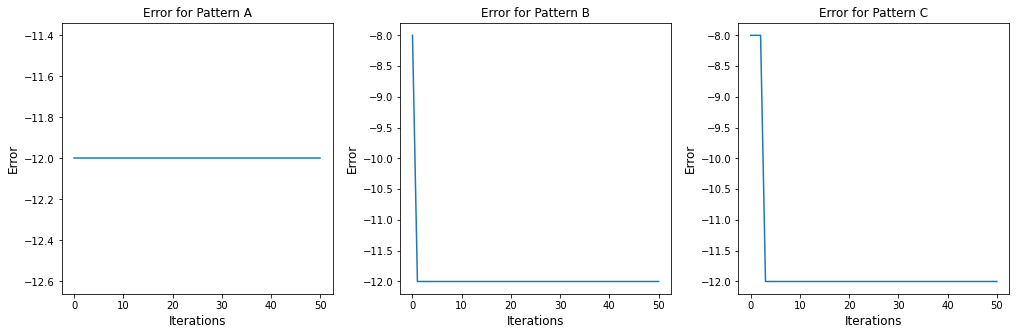

In [4]:
fig, ax = plt.subplots(figsize=(14, 14),nrows=1, ncols=3, constrained_layout=True)
list_letters = ['A','B','C']

num=0
s1,error=hopfield_network(4,iter_num,s_A,weights) 
ax[0].plot(error)
ax[0].set_title('Error for Pattern ' + list_letters[num])
ax[0].set_ylabel('Error', fontsize=12)
ax[0].set_xlabel('Iterations', fontsize=12)
ax[0].set_aspect(1.0/ax[0].get_data_ratio(), adjustable='box');

num=1
s2,error=hopfield_network(4,iter_num,s_B,weights) 
ax[1].plot(error)
ax[1].set_title('Error for Pattern ' + list_letters[num])
ax[1].set_ylabel('Error', fontsize=12)
ax[1].set_xlabel('Iterations', fontsize=12)
ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box');

num=2
s3,error=hopfield_network(4,iter_num,s_C,weights) 
ax[2].plot(error)
ax[2].set_title('Error for Pattern ' + list_letters[num])
ax[2].set_ylabel('Error', fontsize=12)
ax[2].set_xlabel('Iterations', fontsize=12)
ax[2].set_aspect(1.0/ax[2].get_data_ratio(), adjustable='box');

print(" For Pattern A, the input was " + str(s_A) + ' and the ouput was ' + str(s1))
print(" For Pattern A, the input was " + str(s_B) + ' and the ouput was ' + str(s2))
print(" For Pattern A, the input was " + str(s_C) + ' and the ouput was ' + str(s3));

It can be sseen that the pattern A is the only one that is a stable state of the network, while patterns B and C are not.

## 3. Apply Hopfield networks to images

#### 1) Load images.

In [5]:
a=np.load('images.npz')
data=a['arr_0'];

#### 2) Create the weight matrix W

In [6]:
k=data.shape[0]
dimensions= data.shape[1]*data.shape[2]
W=np.zeros((dimensions,dimensions))
S=np.zeros((k,dimensions))

for i in range(0,k):
    S[i,:]=np.ndarray.flatten(data[i,:,:])
    W += np.outer(S[i,:],S[i,:])

W -= np.identity(dimensions)*W;

#### 3) Stability of the patterns

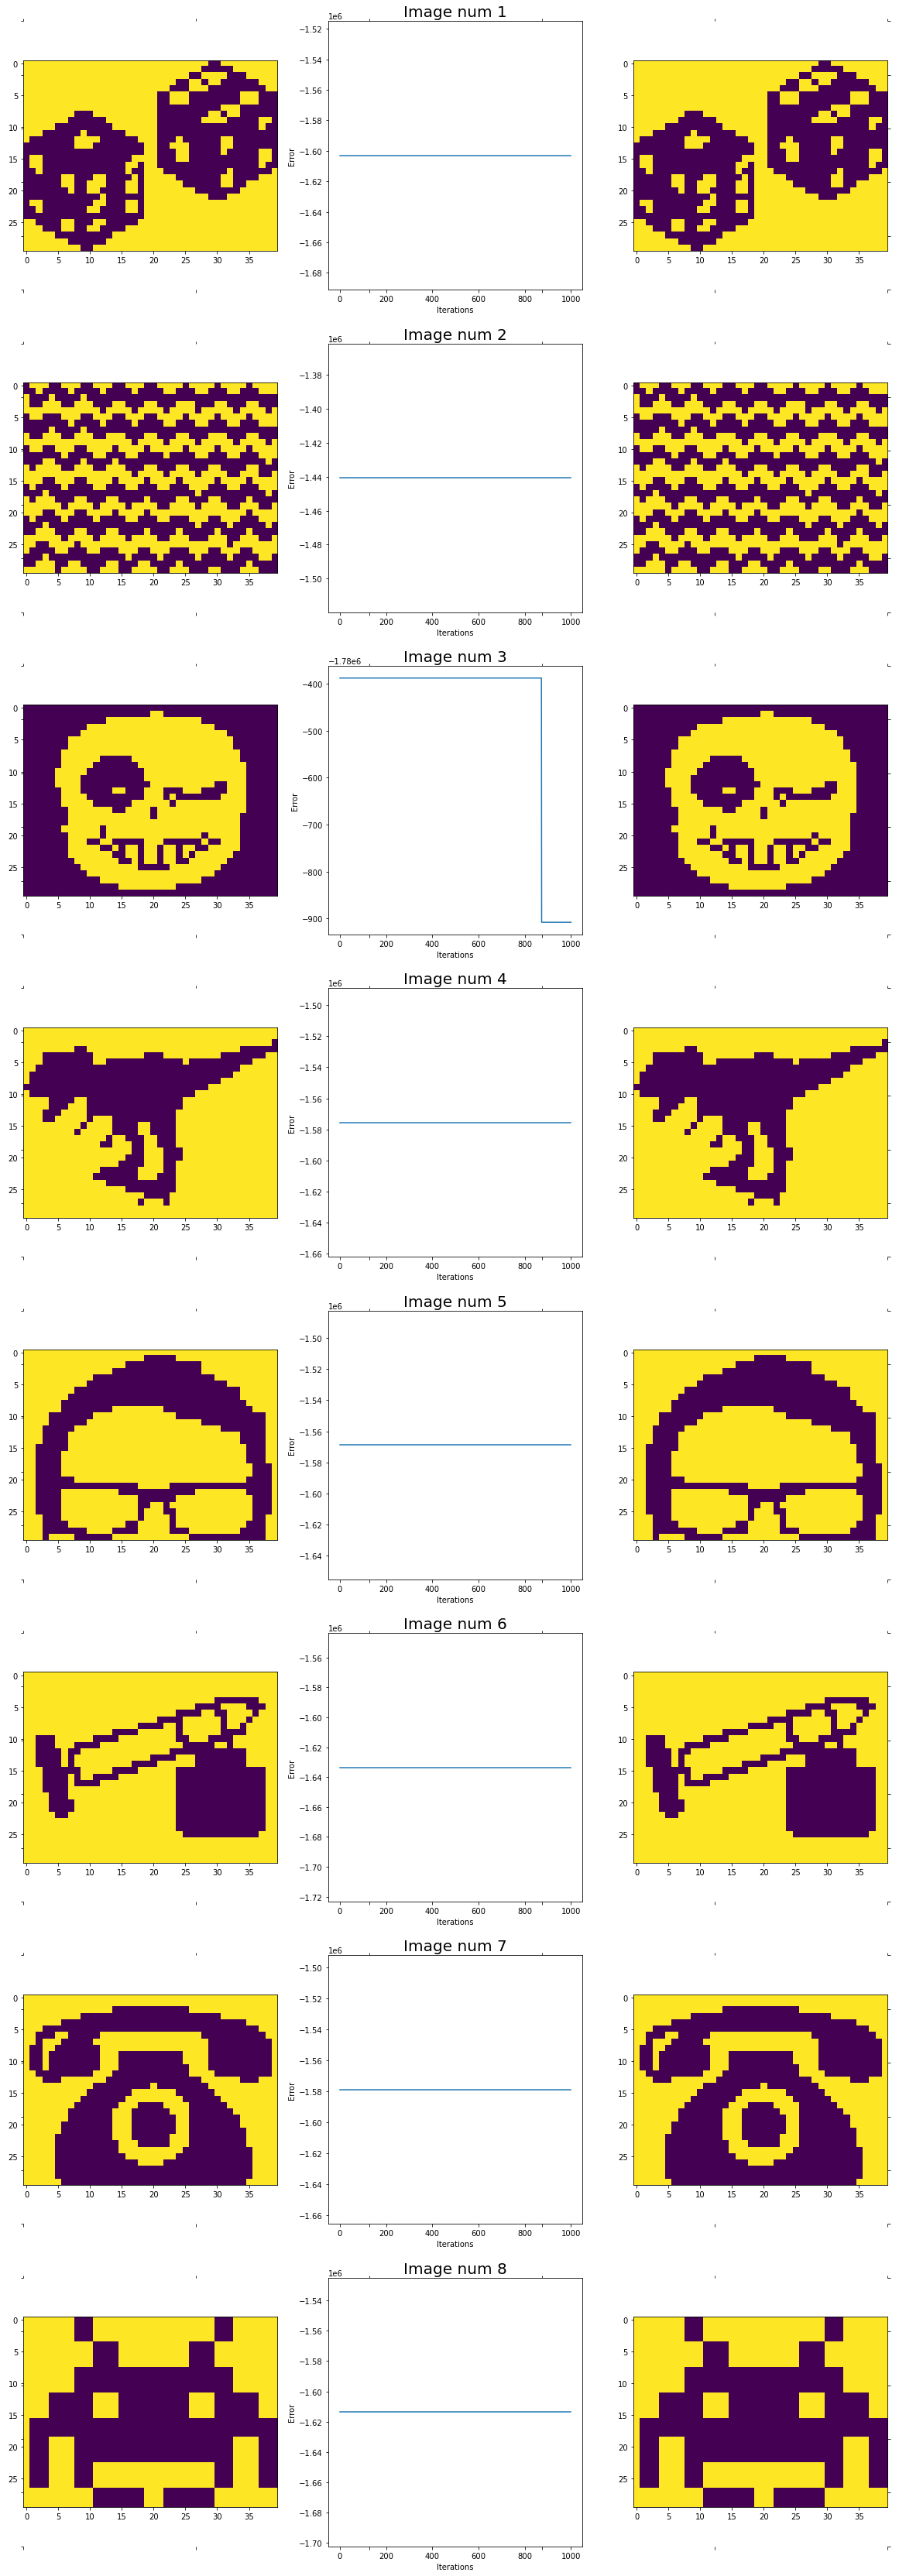

In [7]:
fig, big_axes = plt.subplots ( figsize=(20, 60) , nrows=k, ncols=1, sharey=True)

num = np.arange(0,k)

for row, big_ax in enumerate(big_axes, start=1):
    
    big_ax.set_title("Image num " + str(num[row-1]+1), fontsize=20)

    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

for i in range(0,k):    

    s,error=hopfield_network(dimensions,1000,S[i,:],W) 
    
    ax = fig.add_subplot(8,3,3*i+1)
    plt.imshow(data[i,:,:])
    
    ax = fig.add_subplot(8,3,3*i+2)
    plt.plot(error)
    plt.ylabel('Error')
    plt.xlabel('Iterations');
    
    ax = fig.add_subplot(8,3,3*i+3)
    
    plt.imshow(np.reshape(s,(data.shape[1],data.shape[2])));

As it can be seen in the chart above, the ouput of the network is the same as the input. That means that all patterns are actually stable.

## 4. Create a random pattern.

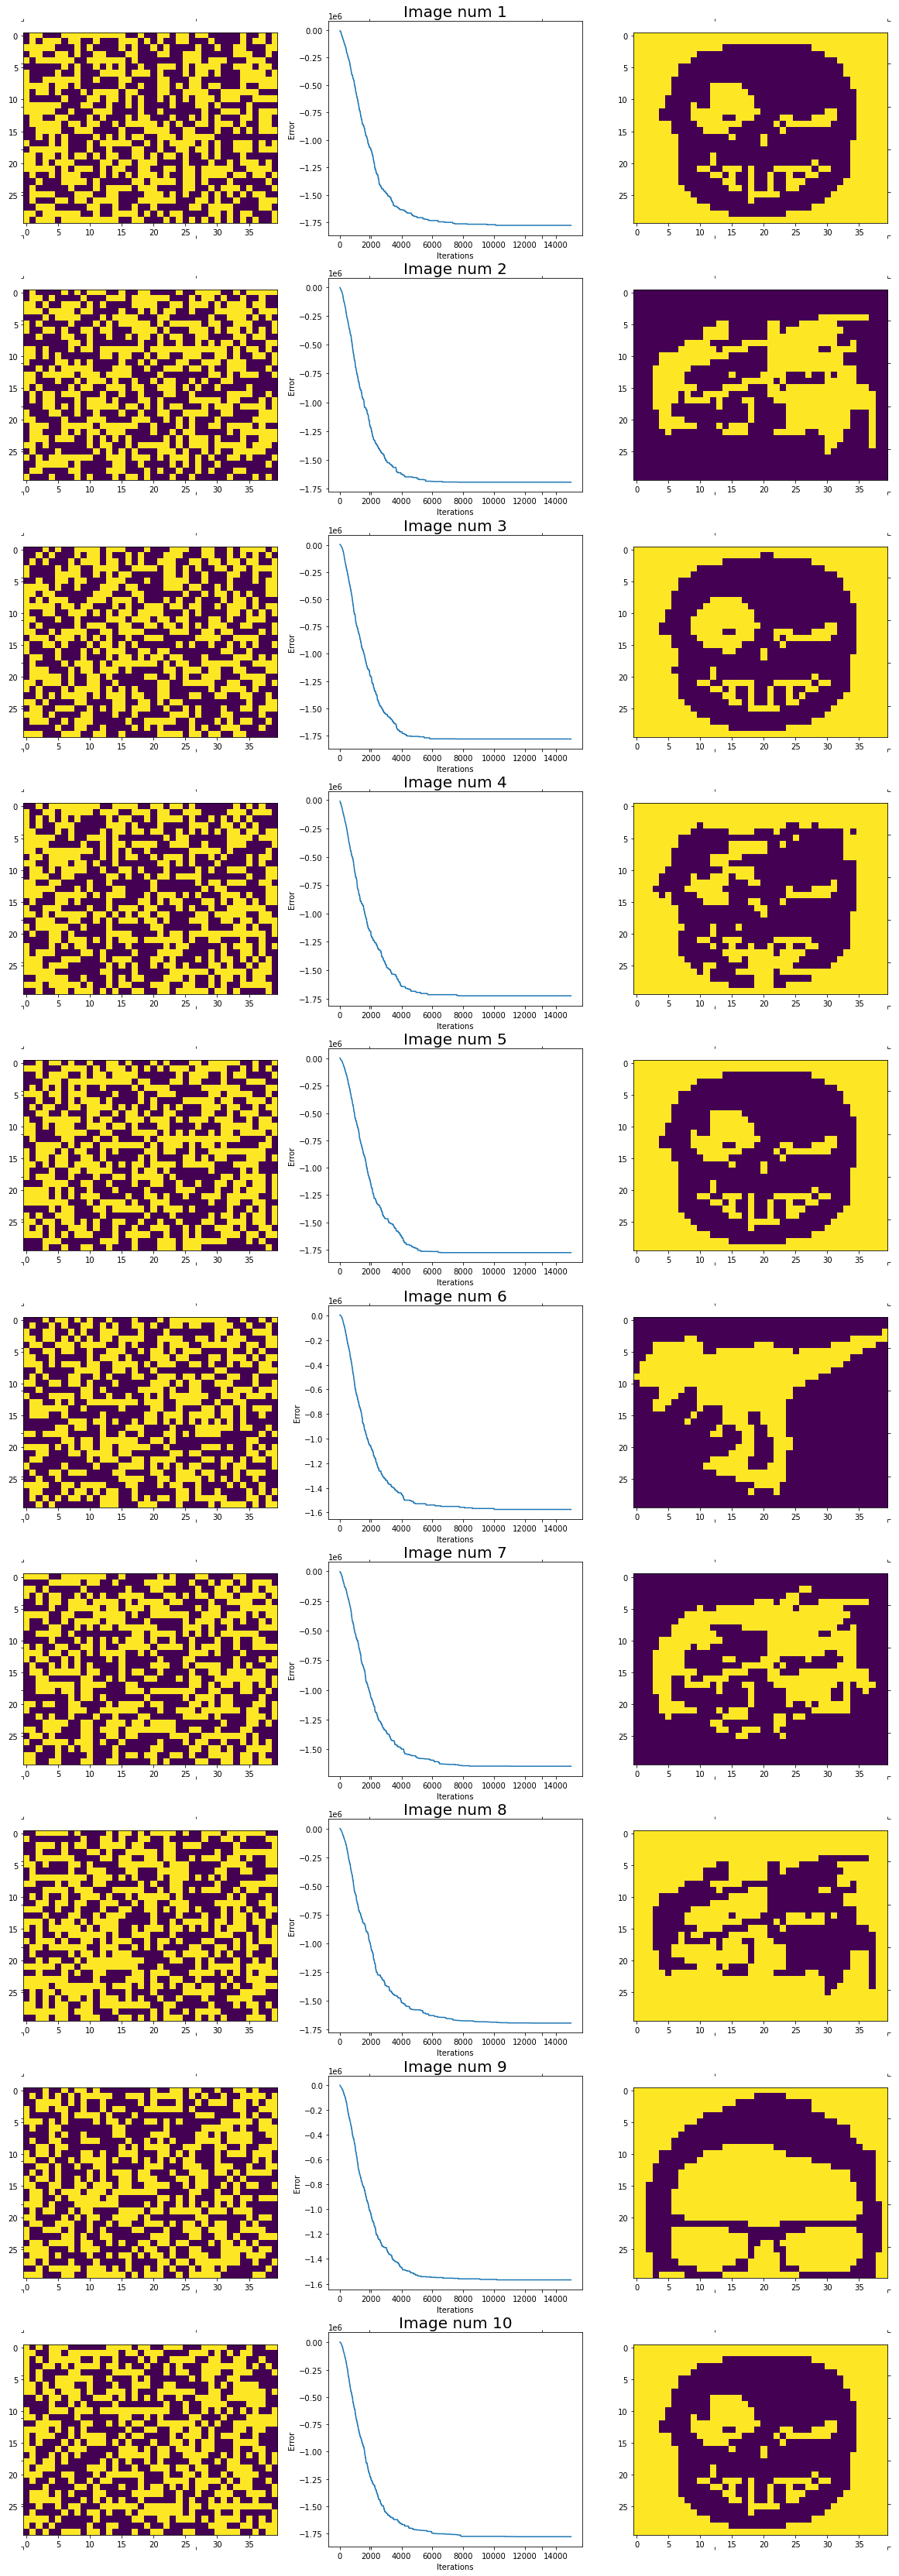

In [8]:
times_repeat=10

fig, big_axes = plt.subplots ( figsize=(20, 60) , nrows=times_repeat, ncols=1, sharey=True)

num = np.arange(0,times_repeat)

for row, big_ax in enumerate(big_axes, start=1):
    
    big_ax.set_title("Image num " + str(num[row-1]+1), fontsize=20)

    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

for i in range(0,times_repeat):    
    
    s_random=[]
    s_random=np.random.normal(0,1,dimensions)

    for j in range(0,dimensions):
        s_random[j]=sign_act(s_random[j])

    b=np.reshape(s_random,(data.shape[1],data.shape[2]))
    
    ax = fig.add_subplot(times_repeat,3,3*i+1)
    
    plt.imshow(b)
    
    s1,error1=hopfield_network(dimensions,15000,s_random,W) 

    ax = fig.add_subplot(times_repeat,3,3*i+2)
    
    plt.plot(error1)
    plt.ylabel('Error',  fontsize=10)
    plt.xlabel('Iterations', fontsize=10);
    
    ax = fig.add_subplot(times_repeat,3,3*i+3)
    
    plt.imshow(np.reshape(s1,(data.shape[1],data.shape[2])));

## 5. Using parts of previous memories

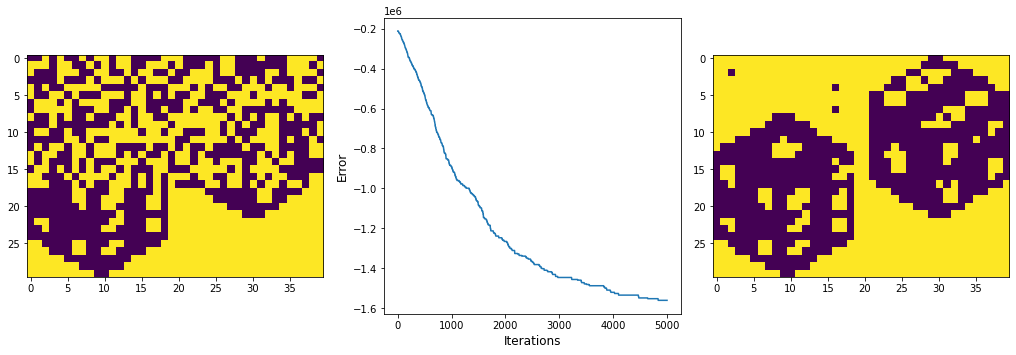

In [9]:
# We establish here the percentage of the random image we want to use
percentage=0.6
n=np.array(np.floor(dimensions*percentage),dtype='int')
s_random2=np.random.normal(0,1,n)

# We substitute the values of the stored pattern into the random one
for i in range(0,dimensions):
    if i<n:
        s_random2[i]=sign_act(s_random2[i])
    else:
        s_random2= np.append(s_random2,S[0,i])
        
c=np.reshape(s_random2,(data.shape[1],data.shape[2]))

fig, ax = plt.subplots(figsize=(14, 14),nrows=1, ncols=3, constrained_layout=True)

ax[0].imshow(c)

s2, error2=hopfield_network(dimensions,5000,s_random2,W)

ax[1].plot(error2)
ax[1].set_ylabel('Error', fontsize=12)
ax[1].set_xlabel('Iterations', fontsize=12)
ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box');

    
d=np.reshape(s2,(data.shape[1],data.shape[2]))
ax[2].imshow(d);